# Defining the problem

Here i want to observe the overfitting patter and the impact of various algorithm to the solution to this problem. I am wonna work with the IMDB dataset in keras

# Loading the data

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Let's have a look at the raw data

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

Get the word index

In [6]:
word_index = imdb.get_word_index()
# print(word_index)

In [10]:
# make the reveerse of key, value pair to use it
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
# print(reversed_word_index)

In [14]:
# Now decode a review to see the text

decoded_review = ' '.join([reversed_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Data preprocessing

In [16]:
print(train_data.shape)

(25000,)


In [17]:
print(type(train_data))

<class 'numpy.ndarray'>


In [18]:
print(type(train_data[0]))

<class 'list'>


In [21]:
# Vectorize the data with one hot encoding

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
# processing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building the model

In [26]:
from keras import models
from keras import layers

from keras import losses
from keras import optimizers
from keras import metrics

In [25]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
# compiling the model
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

# Training the model

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s - loss: 0.5159 - binary_accuracy: 0.7893 - val_loss: 0.4010 - val_binary_accuracy: 0.86510.78
Epoch 2/20
15000/15000 [==============================] - 5s - loss: 0.3145 - binary_accuracy: 0.9031 - val_loss: 0.3242 - val_binary_accuracy: 0.8783
Epoch 3/20
15000/15000 [==============================] - 4s - loss: 0.2318 - binary_accuracy: 0.9243 - val_loss: 0.2808 - val_binary_accuracy: 0.8927
Epoch 4/20
15000/15000 [==============================] - 5s - loss: 0.1816 - binary_accuracy: 0.9425 - val_loss: 0.2730 - val_binary_accuracy: 0.8902
Epoch 5/20
15000/15000 [==============================] - 5s - loss: 0.1502 - binary_accuracy: 0.9521 - val_loss: 0.2777 - val_binary_accuracy: 0.8889
Epoch 6/20
15000/15000 [==============================] - 5s - loss: 0.1216 - binary_accuracy: 0.9633 - val_loss: 0.3187 - val_binary_accuracy: 0.8814
Epoch 7/20
15000/15000 [================

In [32]:
print(history.history.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'binary_accuracy', 'loss'])


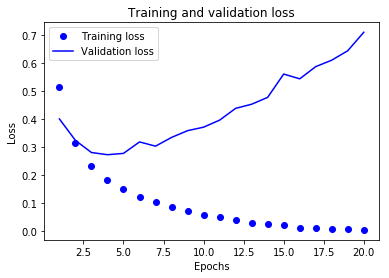

In [36]:
# Plotting the losses
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

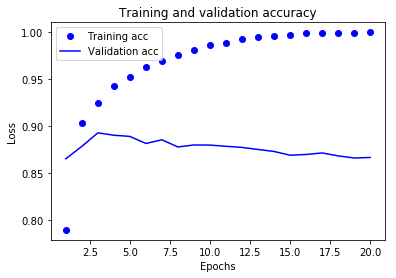

In [37]:
# plotting the accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()